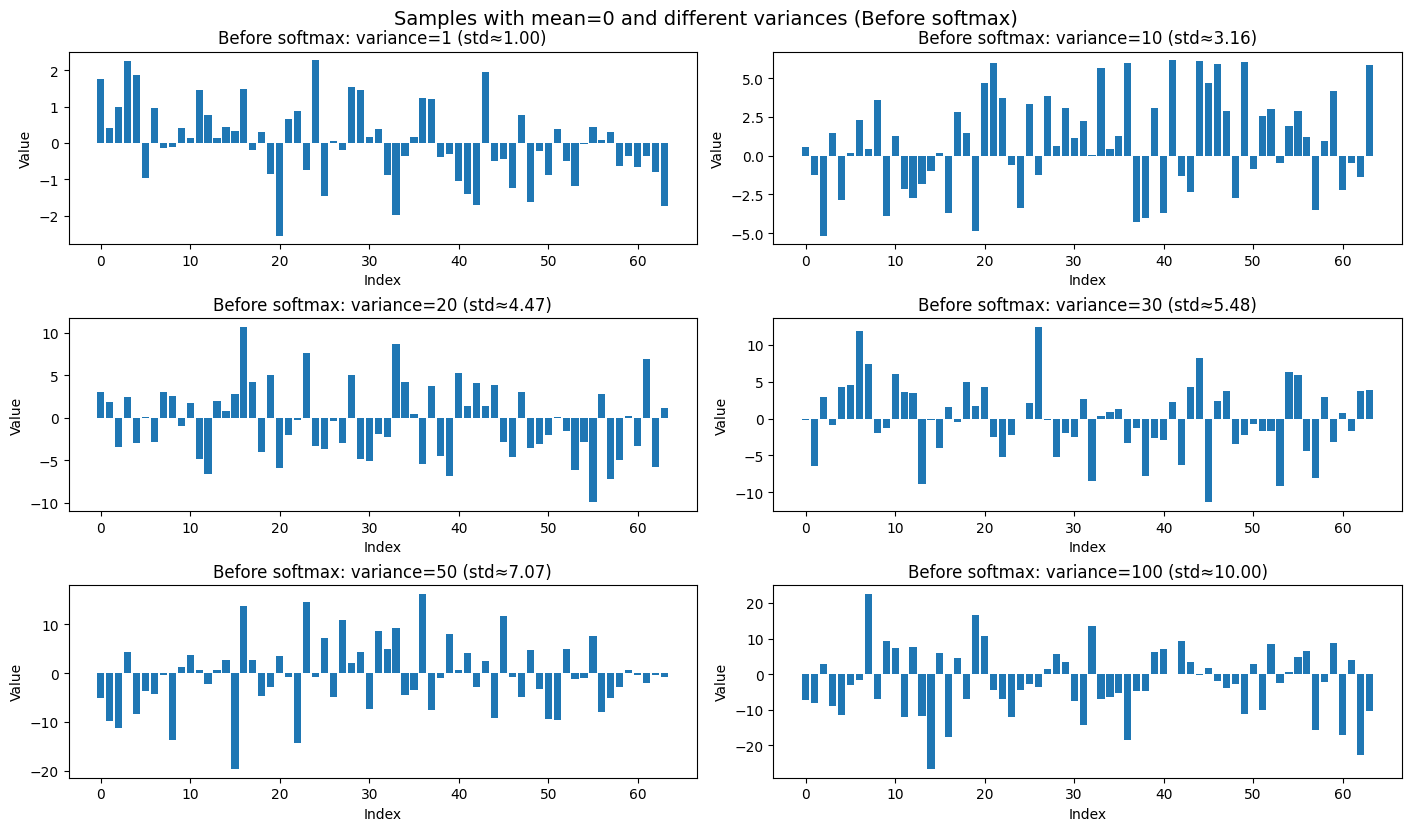

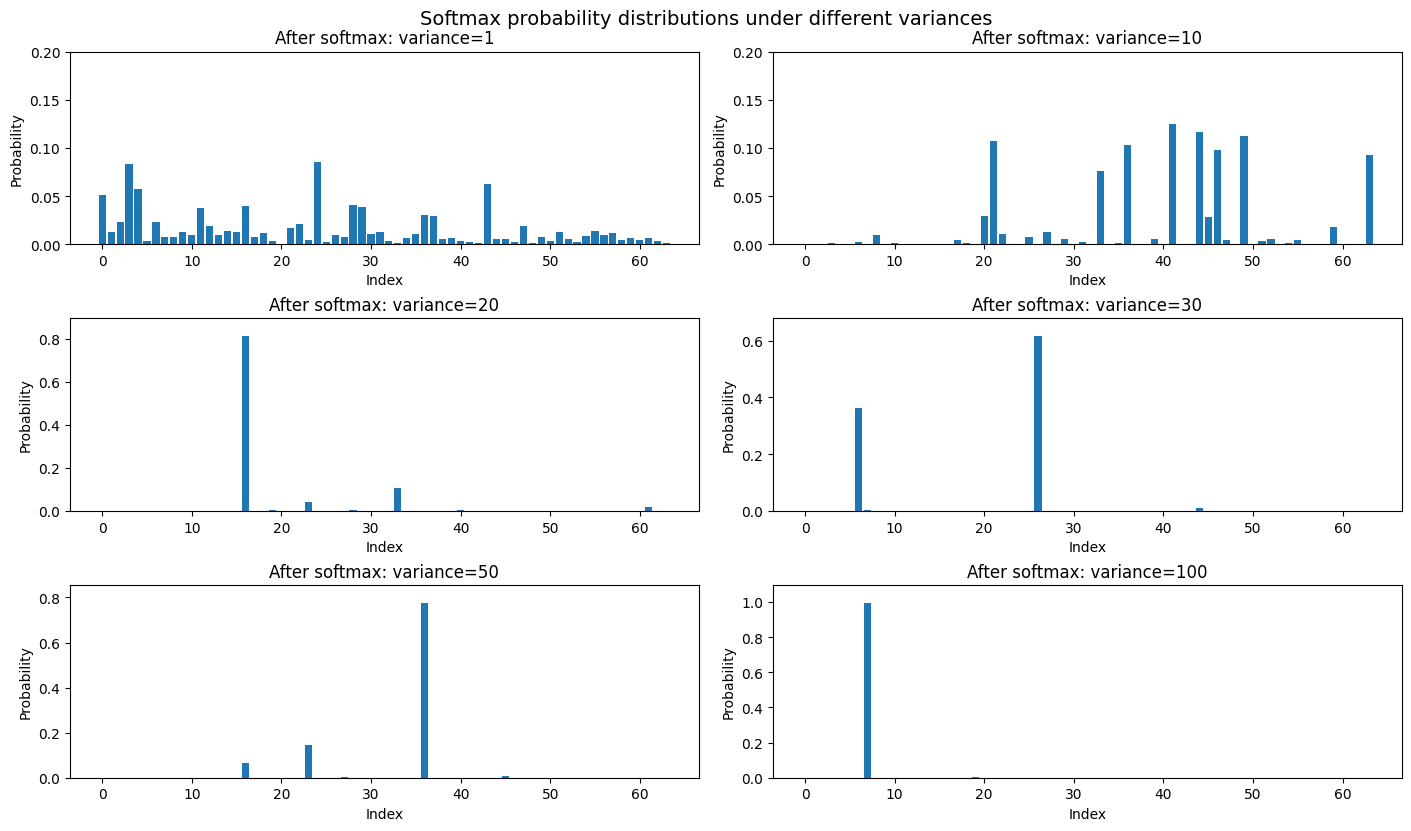

In [1]:
"""
Visualizing how softmax output changes as input variance increases.
Variances: [1, 10, 20, 30, 50, 100]
Each sample has 64 elements.
Generates two 3x2 figures:
  1) Before softmax
  2) After softmax
"""
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
variances = [1, 10, 20, 30, 50, 100]
n = 64


def stable_softmax(x: np.ndarray) -> np.ndarray:
    x = np.asarray(x, dtype=np.float64)
    x_shift = x - np.max(x)
    exps = np.exp(x_shift)
    return exps / np.sum(exps)


# Generate samples
samples = [np.random.normal(0.0, np.sqrt(v), size=n) for v in variances]
softmaxed = [stable_softmax(x) for x in samples]

# Plot before softmax
fig1, axes1 = plt.subplots(3, 2, figsize=(14, 8), constrained_layout=True)
axes1 = axes1.ravel()
for ax, var, x in zip(axes1, variances, samples):
    ax.bar(np.arange(n), x)
    ax.set_title(f"Before softmax: variance={var} (std≈{np.sqrt(var):.2f})")
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
fig1.suptitle(
    "Samples with mean=0 and different variances (Before softmax)", fontsize=14, y=1.02
)

# Plot after softmax
fig2, axes2 = plt.subplots(3, 2, figsize=(14, 8), constrained_layout=True)
axes2 = axes2.ravel()
for ax, var, s in zip(axes2, variances, softmaxed):
    ax.bar(np.arange(n), s)
    ax.set_title(f"After softmax: variance={var}")
    ax.set_xlabel("Index")
    ax.set_ylabel("Probability")
    ax.set_ylim(0, max(0.2, s.max() * 1.1))
fig2.suptitle(
    "Softmax probability distributions under different variances", fontsize=14, y=1.02
)

plt.show()